In [ ]:
import matplotlib.pyplot as plt
import numpy as np

k_interval = np.linspace(-np.pi, np.pi, 2000)

eps_k = - np.cos(k_interval)

In [ ]:
def plot_band(xarray, yarray, phase_lower, phase_higher, arrow=False, arrow_pos=0, hatch='', save_title=''):
    
    fig, ax = plt.subplots(figsize=(8,6))

    # Plot function
    ax.plot(xarray, yarray, color="black", linewidth=2, label=r'$\epsilon_k$')

    ax.fill_between(
        xarray, np.clip(yarray, phase_higher, 1), 1,                      # fill between curve and y=0
        facecolor="#f2f0f0",                       # no solid fill
        alpha=0.5,
        hatch=hatch,                               # dotted hatch pattern
        edgecolor="gray",                       # hatch color
        linewidth=0.0,                          # no outline
        label='Empty'
    )

    #ax.fill_between(k_interval, eps_k, 1, alpha=0.5, color="#e8e8e8")
    ax.fill_between(
        xarray, np.clip(yarray, phase_lower, phase_higher), phase_higher, 
        label='Singly Occupied', 
        alpha=0.4, 
        color="#fff0ab", 
        where=(eps_k<=phase_higher)
    )
    ax.fill_between(
        xarray, np.clip(yarray, -1, phase_lower), phase_lower, 
        label='Doubly Occupied', 
        alpha=0.5, 
        color="#bdffe6", 
        where=(eps_k<=phase_lower)
    )

    # Draw dashed vertical lines
    ax.hlines(phase_higher, -np.arccos(-phase_higher), np.arccos(-phase_higher), colors="black", linestyles="dashed")
    ax.hlines(phase_lower, -np.arccos(-phase_lower), np.arccos(-phase_lower), colors="black", linestyles="dashed")

    if arrow==True:
        ax.annotate(
            '', 
            xy=(arrow_pos, phase_higher), xycoords='data',
            xytext=(arrow_pos, phase_lower), textcoords='data',
            arrowprops=dict(arrowstyle='<->', color='black', linewidth=1.5)
        )

        # Add label next to the arrow
        ax.text(
            arrow_pos + 0.1,                            # a bit to the right of the arrow
            (phase_lower + phase_higher)/2,             # vertically centered
            r"$U$",                                     # LaTeX-style math label
            va="center", ha="left",                     # align middle vertically, left horizontally
            fontsize=14
        )

    # Move y-axis to x=0, and x-axis to y=0
    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_position("zero")

    # Hide the other spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

    # Remove ticks and numbers
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    #ax.set_xlabel(r'$k$', loc="right")
    #ax.set_ylabel(r'$\epsilon_k$', loc="top", rotation=0)

    ax.legend(fontsize=14, loc="lower left", frameon=False)

    # Optional: equal aspect ratio for aesthetics
    ax.set_aspect("auto")

    if save_title != '':
        plt.savefig(save_title, bbox_inches="tight")

    plt.show()


plot_band(k_interval, eps_k, -0.3, 0.6, arrow=True, arrow_pos=0.8, hatch='', save_title='Plots/phase1.pdf')
plot_band(k_interval, eps_k, -0.2, 1, arrow_pos=0.8, save_title='Plots/phase3.pdf')
plot_band(k_interval, eps_k, -1, 0.6, save_title='Plots/phase2.pdf')
plot_band(k_interval, eps_k, -1, 1, save_title='Plots/phase4.pdf')

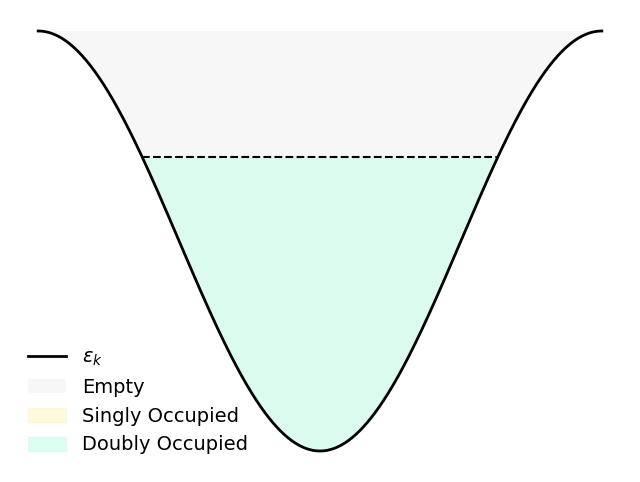

In [ ]:
plot_band(k_interval, eps_k, 0.4, -1, save_title='Plot/attractive.pdf')

In [98]:
def plot_occupation_numbers(k0, k1):
    k0 *= np.pi
    k1 *= np.pi

    x = np.linspace(-np.pi, np.pi, 1000)

    # Define piecewise function
    f = np.piecewise(
        x,
        [np.abs(x) < k0, (np.abs(x) >= k0) & (np.abs(x) < k1), np.abs(x) >= k1],
        [2, 1, 0]
    )

    # Plot
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(x, f, color="black", linewidth=2, label=r'$n_k$', zorder=2)

    # Axes styling: x-axis through zero, no y-axis
    ax.spines["bottom"].set_position("zero")
    ax.spines["bottom"].set_color("black")
    ax.spines["bottom"].set_linewidth(1.2)

    ax.spines["left"].set_position("zero")
    ax.spines["left"].set_color("black")
    ax.spines["left"].set_linewidth(1.2)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    #ax.set_xlabel(r'$k$', loc='right', rotation=0)
    #ax.set_ylabel(r'$n_k$', loc='top', rotation=0)

    ax.vlines((-k0, k0), 0, 1, 'black', linestyles='dashed')

    # Mask for the region -k0 <= x <= k0
    mask = (x >= -k0) & (x <= k0)

    # Fill area between y=0 and y=2 within [-k0, k0]
    ax.fill_between(x[mask], 0, 2,
                    label='Doubly Occupied', 
                    alpha=0.5, 
                    color="#bdffe6")
    
    mask2 = (np.abs(x) >= k0) & (np.abs(x) <= k1)
    
    ax.fill_between(x, 1, 0,
                    label='Singly Occupied', 
                    alpha=0.4, 
                    color="#fff0ab",
                    where=(f==1))

    ax.legend(fontsize=14, loc="upper left", frameon=False)

    # Optional: nice ticks
    ax.set_xticks([-np.pi, -k1, -k0, k0, k1, np.pi])
    ax.set_xticklabels([r"$-\pi$", r"$-k_1$", r"$-k_0$", r"$k_0$", r"$k_1$", r"$\pi$"])
    ax.set_yticks([1])

    # Manual label at the y-axis position (on top of everything)
    ax.text(-0.05, 2.04, "2",
        ha="right", va="center",
        zorder=10, clip_on=False,
        fontsize=10, transform=ax.transData)

    ax.set_xlim(-np.pi, np.pi)
    ax.set_ylim(-0.2, 2.2)

    plt.show()



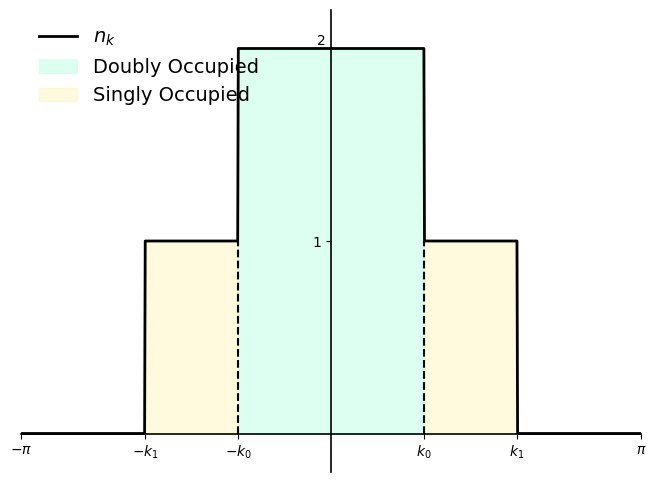

In [99]:
plot_occupation_numbers(0.3, 0.6)